## Independent mixture models
## 3.1 Lab work
### 3.1.1 Modelling
**A priori (before reading the data), do you think a two-state Gaussian model could be appropriate? Why?**

It seems that Gaussian mixtures in this case works. Because the stroke vectors associated with letter A have 2 main directions so these points will form 2 clusters.

### 3.1.2 Data analysis: Gaussian model
#### 1. Plot the data set. Estimate model and prove the reestimation formula

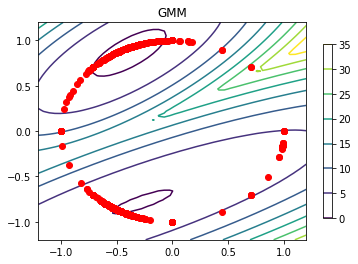

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

X_train = np.loadtxt("Amerge.txt")

gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-1.2, 1.2)
y = np.linspace(-1.2, 1.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.plot(X_train[:, 0], X_train[:, 1], "ro")

plt.title('GMM')
plt.axis('tight')
plt.show()

**EM algorithm** for mixture of Gaussians:

Repeat until convergence: {

+ (E-Step): For each training example *i*, set:
\begin{equation}
\gamma_{ik} = p(z = k|x_i) = \frac{p(x_i|z=k)p(z=k)}{\sum_{k=1}^{K}p(x_i|z=k)p(z=k)} = \frac{\pi_k\mathcal{N}(x_i;\mu_k, \Sigma_k)}{\sum_{k=1}^{K}\pi_k\mathcal{N}(x_i;\mu_k, \Sigma_k)}
\end{equation}

+ (M-Step): Update the parameter
\begin{equation}
\pi_k = \frac{1}{N}\sum_{i=1}^{N}\gamma_{ik}\\
\mu_k = \frac{\sum_{i=1}^{N}\gamma_{ik}x_i}{\sum_{i=1}^{N}\gamma_{ik}}\\
\Sigma_k= \frac{\sum_{i=1}^{N}\gamma_{ik}(x_i - \mu_k)(x_i - \mu_k)^\top}{\sum_{i=1}^{N}\gamma_{ik}}
\end{equation}
}

**Proof of reestimation formulas**
+ Given: data set of N points $x_i, i = 1,...,N$
+ Find mixture of Gaussians (MoG) that best explains data: We assume that data are drawn independently from MoG. Now we want to maximize data log-likelihood w.r.t parameters of MoG:
\begin{equation}
\lambda = \arg\max_{\lambda \in \mathcal{C}}\sum_{i=1}^N \ln \sum_{k=1}^K \pi_kp_{\theta_k}(x_i) = \arg\max_{\lambda \in \mathcal{C}} \mathcal{l}_{x_1, ..., x_N}(\lambda)
\end{equation}
With $\mathcal{C} = \{(\pi_1, ..., \pi_K, \theta_1, ..., \theta_K) | \sum_k\pi_k = 1 \quad\mathrm{and}\quad \forall k, \pi_k \geq 0 \}$. If the states $\mathcal{z} = \{\mathrm{z_1}, ..., \mathrm{z_k} \}$ were known, we would have to maximize 
\begin{equation}
\sum_{i=1}^{N}\sum_{k=1}^K\mathbb{1}_{\{z_i = k\}}\ln\pi_kp_{\theta_k}(x_i)
\end{equation}
Assuming that $\gamma_{ik} = p(z = k|x_i)$, so $\sum_k\gamma_{ik} = 1$. Considering Jensen's inequality for concave function: $\mathbb{E}[f(X)] \leq f(\mathbb{E}[X]$ with $f(x) = \ln(x)$, we have 
\begin{equation}
\sum_{i=1}^{N}\sum_{k=1}^K\mathbb{1}_{\{z_i = k\}}\ln\pi_kp_{\theta_k}(x_i) = \sum_{i=1}^{N}\ln\sum_{k=1}^K\gamma_{ik}\frac{\pi_kp_{\theta_k}(x_i)}{\gamma_{ik}} \geq \sum_{i=1}^{N}\sum_{k=1}^K\gamma_{ik}\ln\frac{\pi_kp_{\theta_k}(x_i)}{\gamma_{ik}}
\end{equation}
Now, to find parameters of mixture of Gaussians model, we need to maximize the quantity
\begin{align*}
\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}}
\end{align*}
Taking the derivative with respect to $\mu_l$, we find
\begin{align*}
&\nabla_{\mu_l}\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}} \\
&= -\nabla_{\mu_l} \sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k) \\
&= \frac{1}{2}\sum_{i=1}^N \gamma_{il}\nabla_{\mu_l}2\mu_l^\top\Sigma_l^{-1}x_i - \mu_l^\top\Sigma_l^{-1}\mu_l \\
&= \sum_{i=1}^N \gamma_{il}(\Sigma_l^{-1}x_i - \Sigma_l^{-1}\mu_l)
\end{align*}
Setting this to zero and solving for $\mu_l$, we find
\begin{equation}
\mu_l = \frac{\sum_{i=1}^{N}\gamma_{il}x_i}{\sum_{i=1}^{N}\gamma_{il}}
\end{equation}
Taking the derivative with respect to $\Sigma_l$, we have
\begin{align*}
&\nabla_{\Sigma_l}\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}} \\
&= -\nabla_{\Sigma_l} \sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \frac{1}{2}((x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k) + \ln|\Sigma_k|)\\
&= \frac{1}{2}\sum_{i=1}^N \gamma_{il}(\Sigma_l^{-2}(x_i - \mu_l)^\top(x_i - \mu_l) - \Sigma_l^{-1})
\end{align*}
Setting this to zero and solving for $\Sigma_l$, we find
\begin{equation}
\Sigma_l= \frac{\sum_{i=1}^{N}\gamma_{il}(x_i - \mu_l)(x_i - \mu_l)^\top}{\sum_{i=1}^{N}\gamma_{il}}
\end{equation}


In the M-step, it updates the parameters of model based on observed $\mathcal{z} = \{\mathrm{z_1}, ..., \mathrm{z_k} \}$. Since $\mathcal{z}$ is observed, the maximization of log-likelihood becomes easy to solve.

#### 2. Label data using estimated model

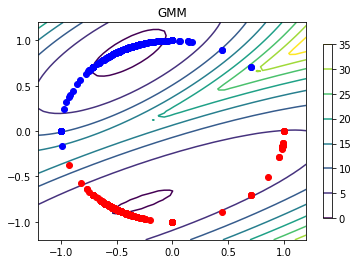

In [3]:
Y_predict = gmm.predict(X_train)

cluster_0 = X_train[Y_predict == 0]
cluster_1 = X_train[Y_predict == 1]

# display predicted scores by the model as a contour plot
x = np.linspace(-1.2, 1.2)
y = np.linspace(-1.2, 1.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.plot(cluster_0[:, 0], cluster_0[:, 1], "ro")
plt.plot(cluster_1[:, 0], cluster_1[:, 1], "bo")
plt.title('GMM')
plt.axis('tight')
plt.show()

#### 3. Propose and implement a graphical (visual) method to validate the assumption of bivariate Gaussian emission distributions. What to think about this assumption?
Draw histogram distribution of data over dimensions

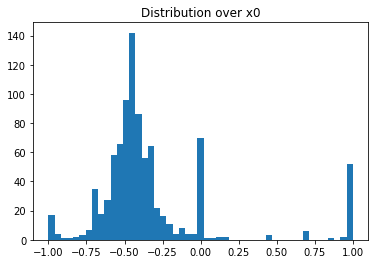

In [4]:
a = np.hstack(X_train[:, 0])
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution over x0")
plt.show()

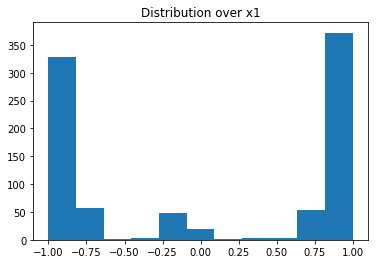

In [5]:
a = np.hstack(X_train[:, 1])
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution over x1")
plt.show()

We can see that the clusters in the distribution over x1 does not have a bell curve shape. So the Gaussian mixture model in this case does not work well.

#### 4. Define von Mises and mixtures of von Mises distributions.


**von Mises** distribution is a continuous probability distribution on the unit circle. It may be thought of as the circular analogue of the normal distribution. The von Mises probability density function for the angle $x$ given by:

\begin{equation}
p(x \vert \mu, \kappa) = \frac{e^{\kappa cos(x - \mu)}}{2\pi I_0(\kappa)}
\end{equation}

Where $\mu$ is the mode and $\kappa$ is the dispersion, and $I_0(\kappa)$ is the modified Bessel function of order $0$. The parameters $\mu$ and $\frac{1}{\kappa}$ are analogous to $\mu$ and $\sigma^2$ (the mean and variance) in the normal distribution

**Mixture of von Mises** distributions: Mixture density is weighted sum of von Mises densities:

\begin{equation}
p(x) = \sum_{k=1}^{K}\pi_k\frac{e^{\kappa_k cos(x - \mu_k)}}{2\pi I_0(\kappa_k)}
\end{equation}

with $\forall k, \pi_k \geq 0$ and $\sum_{k=1}^{K}\pi_k = 1$. So parameters are $\pi_k, \mu_k \quad \mathrm{and} \quad \kappa_k$

#### 5. Would a mixture of von Mises distributions be more or less adequate than Gaussian mixtures on the real data set of part 3.1? Why?

**Mixture of von Mises** seems to be more adequate than **Gaussian Mixtures** on this data set. Because intuitively, the points in the data set all belong to the unit circle in the 2D space, which is totally adapted to **von Mises** distribution, when **Gaussian Mixtures** works well with data points spreading over all directions.

### 3.2 Mandatory additional questions
#### 1. Extend the scikit-learn mixture library by implementing mixtures of von Mises distributions. Justify the E-step of the EM algorithm with equations.

EM algorithm of Mixtures of von Mises distributions:
Repeat until convergence: {

+ (E-Step): For each training example *i*, set:
\begin{equation}
\gamma_{ik} = p(z = k|x_i) = \frac{p(x_i|z=k)p(z=k)}{\sum_{k=1}^{K}p(x_i|z=k)p(z=k)} = \frac{\pi_k\mathcal{V}(x_i;\mu_k, \kappa_k)}{\sum_{k=1}^{K}\pi_k\mathcal{V}(x_i;\mu_k, \kappa_k)}
\end{equation}

+ (M-Step): Update the parameter
\begin{equation}
\pi_k = \frac{1}{N}\sum_{i=1}^{N}\gamma_{ik}\\
\mu_k = \arctan(\frac{\sum_{i=1}^{N}\gamma_{ik}\sin x_i}{\sum_{i=1}^{N}\gamma_{ik}\cos x_i})\\
A(\kappa_k)= \frac{\sum_{i=1}^{N}\gamma_{ik}\cos(x_i - \mu_k)}{\sum_{i=1}^{N}\gamma_{ik}}
\end{equation}
The value of $\kappa_k$ can be computed by approximating the value of $A_2^{-1}(x)$ by
\begin{equation}
A_2^{-1}(x) \approx \frac{2x - x^3}{1 - x^2}
\end{equation}
}